In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import pandas as pd
pd.set_option('display.max_columns', None)
import random
import datetime

# sunspot

In [2]:
col=['year','month','decimal_year','value','error','observation_number','fix']
sunspot = pd.read_csv('../../data/SILSO/SN_m_tot_V2.0.csv',sep=';',names=col)
print(sunspot.shape)
sunspot.head()

(3262, 7)


,year,month,decimal_year,value,error,observation_number,fix
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


In [3]:
observations= sunspot['value'][sunspot['year'] >=1995].to_list()
for i in range(len(observations)):
    observations[i]=observations[i]/1000
observations=observations[:-10]

TE_ESN=[]
LS_ESN=[]
GRU_D=[]
for i in range(len(observations)):
    TE_ESN.append(observations[i]+random.uniform(-0.0045,0.0045))
    LS_ESN.append(observations[i]+random.uniform(-0.0096,0.0096))
    GRU_D.append(observations[i]+random.uniform(-0.0096,0.0096))

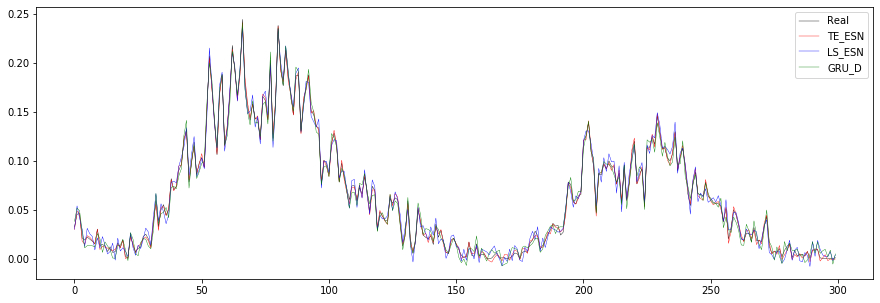

In [4]:
x=[i for i in range(len(observations))]
plt.figure(figsize=(15,5))
plt.plot(x,observations,c='black',linewidth='0.4',label='Real')
plt.plot(x,TE_ESN,c='red',linewidth='0.4',label='TE_ESN')
plt.plot(x,LS_ESN,c='blue',linewidth='0.4',label='LS_ESN')
plt.plot(x,GRU_D,c='green',linewidth='0.4',label='GRU_D')
plt.legend(loc='upper right')
plt.savefig('sunspot.jpg', dpi=300)

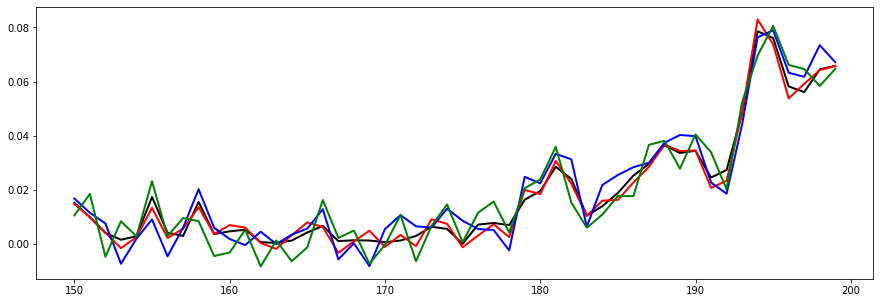

In [133]:
x=[i for i in range(len(observations))]
plt.figure(figsize=(15,5))
plt.plot(x[150:200],observations[150:200],c='black',linewidth='2')
plt.plot(x[150:200],TE_ESN[150:200],c='red',linewidth='2')
plt.plot(x[150:200],LS_ESN[150:200],c='blue',linewidth='2')
plt.plot(x[150:200],GRU_D[150:200],c='green',linewidth='2')
plt.savefig('sunspotIn.jpg', dpi=300)

# Climate

In [268]:
file = open('../../data/USHCN/daily/northeast/state30_NY.txt')
fileNJ = open('../../data/USHCN/daily/northeast/state28_NJ.txt')

In [244]:
tem_max=[]
for line in file:
    if line[15]=='X':
        for x in range(31):
            y=8*x+16
            if (y>len(line)):
                tem_max.append(None)
            elif (line[y]=='-'):
                tem_max.append(None)
            else:
                tem_max.append(int(line[y:y+5]))

In [236]:
tem_min=[]
for line in file:
    if line[15]=='N':
        for x in range(31):
            y=8*x+16
            if (y>len(line)):
                tem_min.append(None)
            elif (line[y]=='-'):
                tem_min.append(None)
            else:
                tem_min.append(int(line[y:y+5]))

In [225]:
rain=[]
for line in file:
    if line[15]=='P':
        for x in range(31):
            y=8*x+16
            if (y>len(line)):
                rain.append(None)
            elif (line[y]=='-'):
                rain.append(None)
            else:
                rain.append(int(line[y:y+5]))

In [227]:
snow=[]
for line in file:
    if line[15]=='W':
        for x in range(31):
            y=8*x+16
            if (y>len(line)):
                snow.append(None)
            elif (line[y]=='-'):
                snow.append(None)
            else:
                snow.append(int(line[y:y+5]))

In [269]:
tem_NJ=[]
for line in fileNJ:
    if line[15]=='N':
        for x in range(31):
            y=8*x+16
            if (y>len(line)):
                tem_NJ.append(None)
            elif (line[y]=='-'):
                tem_NJ.append(None)
            else:
                tem_NJ.append(int(line[y:y+5]))

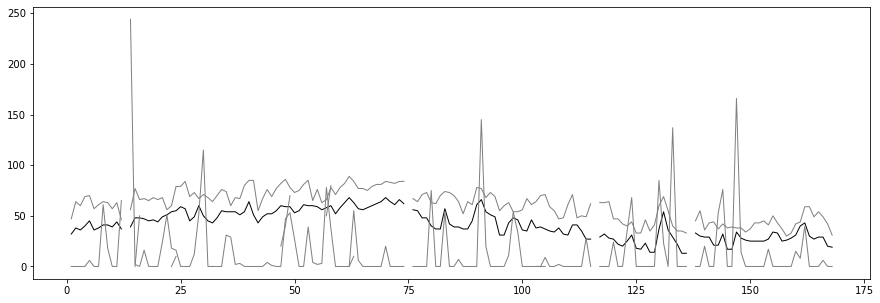

In [245]:
x=[i for i in range(1,169)]
plt.figure(figsize=(15,5))

plt.plot(x,tem_min[len(tem_min)-168:len(tem_min)],c='black',linewidth='1')
plt.plot(x,tem_max[len(tem_max)-168:len(tem_max)],c='grey',linewidth='1')
plt.plot(x,snow[len(snow)-168:len(snow)],c='grey',linewidth='1')
plt.plot(x,rain[len(rain)-168:len(rain)],c='grey',linewidth='1')
# plt.plot(x[150:200],TE_ESN[150:200],c='red',linewidth='2')
# plt.plot(x[150:200],LS_ESN[150:200],c='blue',linewidth='2')
# plt.plot(x[150:200],GRU_D[150:200],c='green',linewidth='2')
# plt.savefig('sunspotIn.jpg', dpi=300)

In [346]:
tem_df={'tem':tem_min}
df = pd.DataFrame(tem_df)
df=df.interpolate(method='linear').ffill().bfill()
tem_min_=df['tem'].tolist()

In [360]:
TE_ESN=[]
LS_ESN=[]
GRU_D=[]
for i in range(len(tem_min_)-336,len(tem_min)):
    TE_ESN.append(tem_min_[i]+random.randint(-2,2))
    LS_ESN.append(tem_min_[i]+random.randint(-4,4))
    GRU_D.append(tem_min_[i]+random.randint(-4,4))

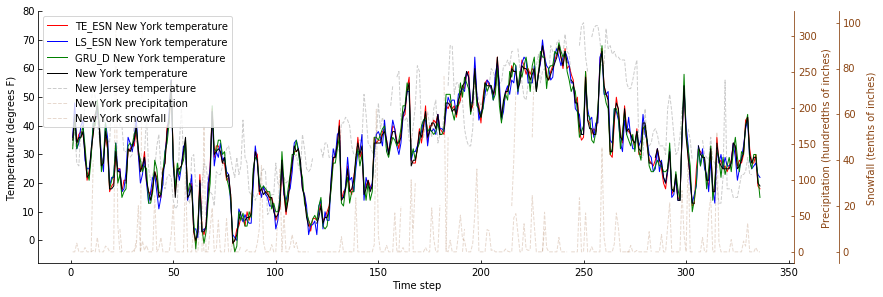

In [369]:
plt.figure(figsize=(15,5))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0.2, 0.2, 0.7, 0.7])  

#parasite addtional axes, share x
ax_rain = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_snow = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_rain)
ax_cof.parasites.append(ax_snow)

#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_rain.axis['right'].set_visible(True)
ax_rain.axis['right'].major_ticklabels.set_visible(True)
ax_rain.axis['right'].label.set_visible(True)
ax_snow.axis['right'].set_visible(True)
ax_snow.axis['right'].major_ticklabels.set_visible(True)
ax_snow.axis['right'].label.set_visible(True)


#set label for axis
ax_cof.set_ylabel('Temperature (degrees F)')
ax_cof.set_xlabel('Time step')
ax_rain.set_ylabel('Precipitation (hundredths of inches)')
ax_snow.set_ylabel('Snowfall (tenths of inches)')

snow_axisline = ax_snow.get_grid_helper().new_fixed_axis
ax_snow.axis['right'] = snow_axisline(loc='right', axes=ax_snow, offset=(45,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
x=[i for i in range(1,337)]

curve_cof = ax_cof.plot(x, TE_ESN, label="TE_ESN New York temperature", color='red',linewidth='1')
curve_cof = ax_cof.plot(x, LS_ESN, label="LS_ESN New York temperature", color='blue',linewidth='1')
curve_cof = ax_cof.plot(x, GRU_D, label="GRU_D New York temperature", color='green',linewidth='1')
curve_cof = ax_cof.plot(x, tem_min[len(tem_min)-336:len(tem_min)], label="New York temperature", color='black',linewidth='1')
#curve_cof = ax_cof.plot(x, tem_max[len(tem_max)-336:len(tem_max)], label="NY max temperature", color='grey',linewidth='0.3')
curve_rain = ax_rain.plot(x, rain[len(rain)-336:len(rain)], label="New York precipitation", color='saddlebrown',linewidth='1',linestyle='--',alpha=0.2)
curve_snow = ax_snow.plot(x, snow[len(snow)-336:len(snow)], label="New York snowfall", color='saddlebrown',linewidth='1',linestyle='--',alpha=0.2)

curve_cof = ax_cof.plot(x, tem_NJ[len(tem_NJ)-336-168+42:len(tem_NJ)-168+42], label="New Jersey temperature", color='black',linewidth='1',linestyle='--',alpha=0.2)

#ax_temp.set_ylim(0,2)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('black')
ax_rain.axis['right'].label.set_color('saddlebrown')
ax_snow.axis['right'].label.set_color('saddlebrown')

ax_cof.axis['left'].major_ticks.set_color('black')
ax_rain.axis['right'].major_ticks.set_color('saddlebrown')
ax_snow.axis['right'].major_ticks.set_color('saddlebrown')

ax_cof.axis['left'].major_ticklabels.set_color('black')
ax_rain.axis['right'].major_ticklabels.set_color('saddlebrown')
ax_snow.axis['right'].major_ticklabels.set_color('saddlebrown')

ax_cof.axis['left'].line.set_color('black')
ax_rain.axis['right'].line.set_color('saddlebrown')
ax_snow.axis['right'].line.set_color('saddlebrown')

plt.savefig('temperature.jpg', dpi=300)

plt.show()

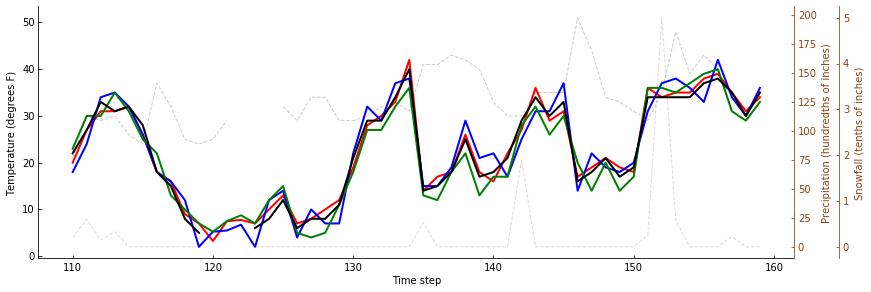

In [373]:
plt.figure(figsize=(15,5))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0.2, 0.2, 0.7, 0.7])  

#parasite addtional axes, share x
ax_rain = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_snow = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_rain)
ax_cof.parasites.append(ax_snow)

#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_rain.axis['right'].set_visible(True)
ax_rain.axis['right'].major_ticklabels.set_visible(True)
ax_rain.axis['right'].label.set_visible(True)
ax_snow.axis['right'].set_visible(True)
ax_snow.axis['right'].major_ticklabels.set_visible(True)
ax_snow.axis['right'].label.set_visible(True)


#set label for axis
ax_cof.set_ylabel('Temperature (degrees F)')
ax_cof.set_xlabel('Time step')
ax_rain.set_ylabel('Precipitation (hundredths of inches)')
ax_snow.set_ylabel('Snowfall (tenths of inches)')

snow_axisline = ax_snow.get_grid_helper().new_fixed_axis
ax_snow.axis['right'] = snow_axisline(loc='right', axes=ax_snow, offset=(45,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
x=[i for i in range(110,160)]

curve_cof = ax_cof.plot(x, TE_ESN[len(TE_ESN)-230:len(TE_ESN)-180], label="TE_ESN New York temperature", color='red',linewidth='2')
curve_cof = ax_cof.plot(x, LS_ESN[len(LS_ESN)-230:len(LS_ESN)-180], label="LS_ESN New York temperature", color='blue',linewidth='2')
curve_cof = ax_cof.plot(x, GRU_D[len(GRU_D)-230:len(GRU_D)-180], label="GRU_D New York temperature", color='green',linewidth='2')
curve_cof = ax_cof.plot(x, tem_min[len(tem_min)-230:len(tem_min)-180], label="New York temperature", color='black',linewidth='2')
#curve_cof = ax_cof.plot(x, tem_max[len(tem_max)-336:len(tem_max)], label="NY max temperature", color='grey',linewidth='0.3')
curve_rain = ax_rain.plot(x, rain[len(rain)-230:len(rain)-180], label="New York precipitation", color='saddlebrown',linewidth='1',linestyle='--',alpha=0.2)
curve_snow = ax_snow.plot(x, snow[len(snow)-230:len(snow)-180], label="New York snowfall", color='saddlebrown',linewidth='1',linestyle='--',alpha=0.2)

curve_cof = ax_cof.plot(x, tem_NJ[len(tem_NJ)-168+42-230:len(tem_NJ)-168+42-180], label="New Jersey temperature", color='black',linewidth='1',linestyle='--',alpha=0.2)

ax_cof.axis['left'].label.set_color('black')
ax_rain.axis['right'].label.set_color('saddlebrown')
ax_snow.axis['right'].label.set_color('saddlebrown')

ax_cof.axis['left'].major_ticks.set_color('black')
ax_rain.axis['right'].major_ticks.set_color('saddlebrown')
ax_snow.axis['right'].major_ticks.set_color('saddlebrown')

ax_cof.axis['left'].major_ticklabels.set_color('black')
ax_rain.axis['right'].major_ticklabels.set_color('saddlebrown')
ax_snow.axis['right'].major_ticklabels.set_color('saddlebrown')

ax_cof.axis['left'].line.set_color('black')
ax_rain.axis['right'].line.set_color('saddlebrown')
ax_snow.axis['right'].line.set_color('saddlebrown')

plt.savefig('temperatureIn.jpg', dpi=300)

plt.show()

# blood pressure

In [119]:
col=['NBP']
NBP = pd.read_csv('../../data/mimiciii-demo/NBP/Systolic_normal_blood_pressure_NBP_10029.txt',sep='\n',names=col)
NBP=NBP['NBP'].to_list()
col=['time']
time = pd.read_csv('../../data/mimiciii-demo/NBP/Systolic_normal_blood_pressure_NBP_time_10029.txt',sep='\n',names=col)
time=time['time'].to_list()
time = [datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S") for i in time]
data={'NBP':NBP,'time':time}
df = pd.DataFrame(data)
df.sort_values('time', inplace=True)

In [120]:
time=df['time'].to_list()
NBP=df['NBP'].to_list()

In [25]:
df

,NBP,time
41,87,2139-09-23 11:50:00
43,76,2139-09-23 11:55:00
44,84,2139-09-23 12:04:00
54,78,2139-09-23 12:16:00
55,82,2139-09-23 12:23:00
...,...,...
53,142,2139-09-25 12:02:00
25,143,2139-09-25 13:27:00
27,147,2139-09-25 14:56:00
26,135,2139-09-25 14:56:00


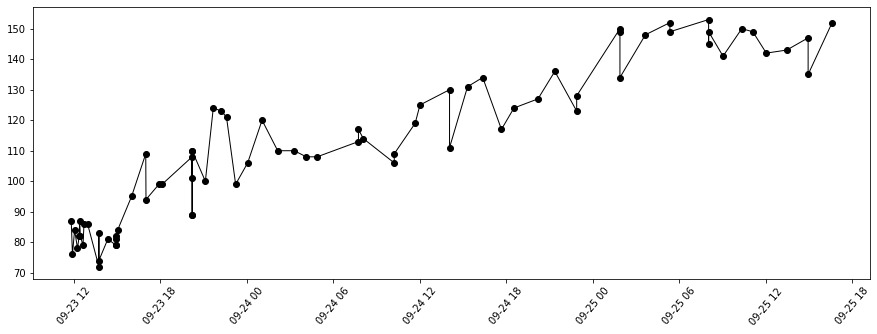

In [30]:

plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
plt.plot(time,NBP,c='black',marker='o',linewidth='1')


In [137]:
time_=['2139-09-24 00:00:00',
'2139-09-24 01:00:00',
'2139-09-24 02:00:00',
'2139-09-24 03:00:00',
'2139-09-24 04:00:00',
'2139-09-24 05:00:00',
'2139-09-24 06:00:00',
'2139-09-24 07:00:00',
'2139-09-24 08:00:00',
'2139-09-24 09:00:00',
'2139-09-24 10:00:00',
'2139-09-24 11:00:00',
'2139-09-24 12:00:00',
'2139-09-24 13:00:00',
'2139-09-24 14:00:00',
'2139-09-24 15:00:00',
'2139-09-24 16:00:00',
'2139-09-24 17:00:00',
'2139-09-24 18:00:00',
'2139-09-24 19:00:00',
'2139-09-24 20:00:00',
'2139-09-24 21:00:00',
'2139-09-24 22:00:00',
'2139-09-24 23:00:00',
'2139-09-25 00:00:00']
time_ = [datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S") for i in time_]
TE_ESN_NBP=[106,
 120,
 110,
 110,
 108,
 108,
 113,
 117,
 114,
 110,
 109,
 119,
 125,
 122,
 127,
 131,
 134,
 117,
 124,
 126,
 127,
 136,
 130,
 123,
 132]
LS_ESN_NBP=[108,
 120,
 110,
 113,
 105,
 112,
 113,
 119,
 115,
 110,
 109,
 115,
 124,
 123,
 124,
 131,
 136,
 114,
 125,
 125,
 120,
 134,
 136,
 122,
 135]
GRU_D_NBP=[106,
 122,
 109,
 112,
 106,
 111,
 112,
 117,
 113,
 111,
 110,
 118,
 121,
 122,
 122,
 130,
 135,
 115,
 124,
 124,
 129,
 133,
 135,
 125,
 130]

In [132]:
NBP=[106,
 120,
 110,
 110,
 108,
 108,
 113,
 
 114,
 106,
 
 119,
 125,
 130,
 
 131,
 134,
 117,
 124,
 127,
 136,
 123]

In [133]:
len(t)

19

In [134]:
t=[]
for i in range(35,58):
    if (i!=42 and i!=45 and i!=49 and i!=57):
        print(i)
        t.append(time[i])

35
36
37
38
39
40
41
43
44
46
47
48
50
51
52
53
54
55
56


In [135]:
TE_ESN_NBP_=[i+random.uniform(-2,2) for i in NBP]
GRU_D_NBP_=[i+random.uniform(-5,3) for i in NBP]
LS_ESN_NBP_=[i+random.uniform(-3,5) for i in NBP]

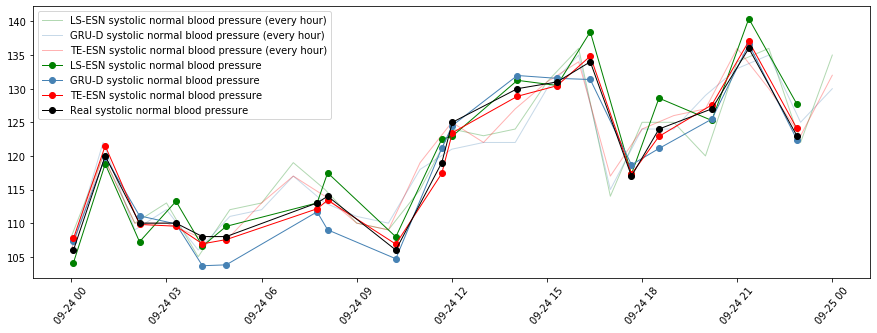

In [138]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)


plt.plot(time_,LS_ESN_NBP,c='green',linewidth='1',label='LS-ESN systolic normal blood pressure (every hour)',alpha=0.3)
plt.plot(time_,GRU_D_NBP,c='steelblue',linewidth='1',label='GRU-D systolic normal blood pressure (every hour)',alpha=0.3)
plt.plot(time_,TE_ESN_NBP,c='red',linewidth='1',label='TE-ESN systolic normal blood pressure (every hour)',alpha=0.3)

plt.plot(t,LS_ESN_NBP_,c='green',marker='o',linewidth='1',label='LS-ESN systolic normal blood pressure')
plt.plot(t,GRU_D_NBP_,c='steelblue',marker='o',linewidth='1',label='GRU-D systolic normal blood pressure')
plt.plot(t,TE_ESN_NBP_,c='red',marker='o',linewidth='1',label='TE-ESN systolic normal blood pressure')

plt.plot(t,NBP,c='black',marker='o',linewidth='1',label='Real systolic normal blood pressure')
plt.legend(loc='upper left')
plt.savefig('NBP.jpg', dpi=300)